In [1]:
from fastai import *
from fastai.vision import *
from fastai.callback.hook import *
from fastai.vision.all import *

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

import os

/home/wacira/anaconda3/envs/deep_learning/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Create a DataLoaders from Data 

This means assembling the data into a format that can be used to train the model

In [2]:
train_folder = '../data/train'

The DataBlock API below creates a data block object that is basically like a template for creating a data loaders

In [3]:
skin_condition = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(244))

In [4]:
dls = skin_condition.dataloaders(train_folder)

The dataloaders above contains the training and validation data that has been partitioned from the train data which I have provided as the path containing my data.

NB: I haven't used the test data provided, yet. Only partitioned the train data to provide the train and test sets

### Checking sample in the validation dataset

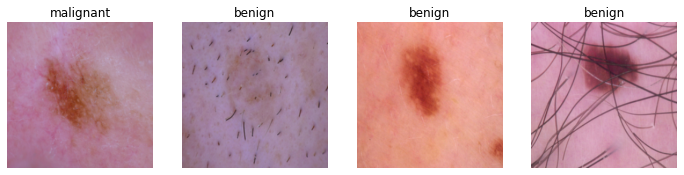

In [5]:
dls.valid.show_batch(max_n=4, nrows=1)

### Creating a Learner and Fine-tuning it.

In [6]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

/home/wacira/anaconda3/envs/deep_learning/lib/python3.10/site-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/wacira/anaconda3/envs/deep_learning/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/wacira/anaconda3/envs/deep_learning/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.783860,0.505931,0.833017,02:54


epoch,train_loss,valid_loss,accuracy,time
0,0.404536,0.470373,0.825427,03:49
1,0.283509,0.463483,0.834915,04:10
2,0.162693,0.415374,0.851992,03:57
3,0.100091,0.402130,0.863378,04:03


### Visualization Using Confusion Matrix

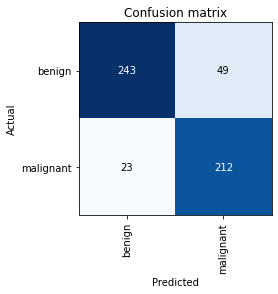

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Saving the model
For this case, we will save both the **Architecture** and the trained **parameters** using the *export* Method provided in fastai.

In [16]:

learn.export("../models/version1.pkl")